### 사전환경설정

In [1]:
# 기본적인 패키지 import

import numpy as np 
import pandas as pd 
import scipy as sp

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 추가

import statsmodels.api as sm
import sklearn as sk

In [3]:
# 한글, 마이너스 부호 깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 전체 데이터(농어) load

In [43]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

#### 농어 길이와 무게의 상관관계 확인

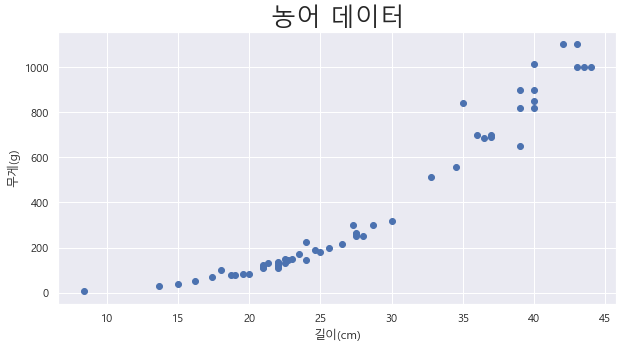

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length, y=perch_weight)
plt.title('농어 데이터', fontsize='25')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')

plt.show()

#### 훈련세트, 테스트세트 분리

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [46]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [47]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [31]:
# 2차원 배열로 만들어주기 1
# new_train_input = np.row_stack((train_input))
# new_train_input
# new_train_input.shape

(1, 42)

In [48]:
# 2차원 배열로 만들어주기 2
new_train_input = train_input.reshape(-1, 1)
new_train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [49]:
new_test_input = np.row_stack((test_input))
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [50]:
print(new_train_input.shape, new_test_input.shape)

(42, 1) (14, 1)


### 결정계수($R^2$) 
- Tex 문법

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knr = KNeighborsRegressor()

# KNN 훈련 | 반드시 훈련세트는 2차원 배열이어야 함!
# knr.fit(X=train_input, y=train_target) # 1차원배열이기때문에 실행시키면 오류가 남
knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor()

In [54]:
# (주의)테스트할때도 X값은 2차원배열이어야 함!
knr.score(X=new_test_input, y=test_target)

# 결과값 >> 결정계수=0.9928

0.992809406101064

### MAE(Mean Absolute Error = 평균 절대 오차)

In [55]:
from sklearn.metrics import mean_absolute_error

# test 세트에 대한 예측 만들기
test_pred = knr.predict(X=new_test_input)

In [57]:
# 테스트할 농어의 길이 세트
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [58]:
# 실제 측정된 농어의 무게 세트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [59]:
# 예측된 농어의 무게 세트
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [60]:
# test_target 세트에 대한 평균 절대값 오차(MAE) 계산하기
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae

19.157142857142862

결과를 봤을 때 예측이 평균적으로 19.15g 정도 타깃값과 다르게 예측되었음

#### 과소적합(underfitting)
- 훈련세트보다 테스트세트의 테스트결과(결정계수값)가 더 좋을 경우
- 훈련세트와 테스트세트의 결정계수값이 모두 낮은 경우

#### 과대적합(overfitting)
- 훈련세트로 나온 결정계수는 매우 좋은 반면 테스트세트의 결정계수는 매우 나쁜 경우

In [62]:
# 테스트로 테스트세트 결정계수 구하기
knr.score(X=new_test_input, y=test_target)

0.992809406101064

In [63]:
# 테스트로 훈련세트 결정계수 구하기
knr.score(X=new_train_input, y=train_target)

0.9698823289099254

### 현재의 과소적합 문제를 해결할 방법
모델은 조금 더 복잡하게 만들 것 -> n_neighbors 기본 5

In [64]:
# 최근접 이웃의 개수를 줄이기
knr.n_neighbors = 3 # 기본=5

# 재훈련
knr.fit(X=new_train_input, y=train_target)
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [66]:
knr.score(X=new_train_input, y=train_target)

# 과소적합 문제를 해결함

0.9804899950518966

확인문제

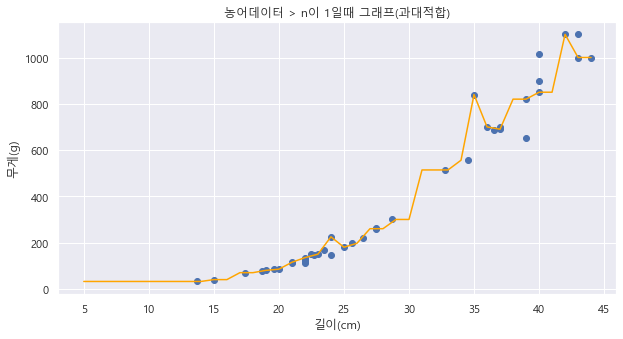

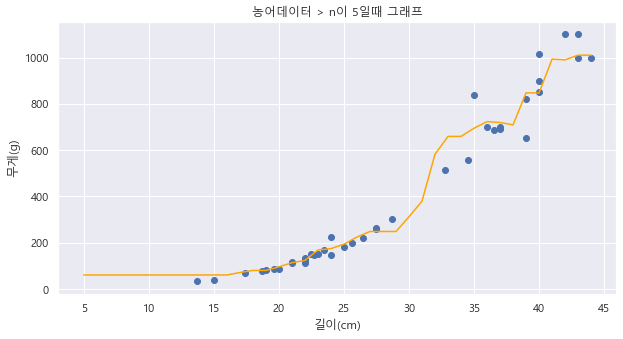

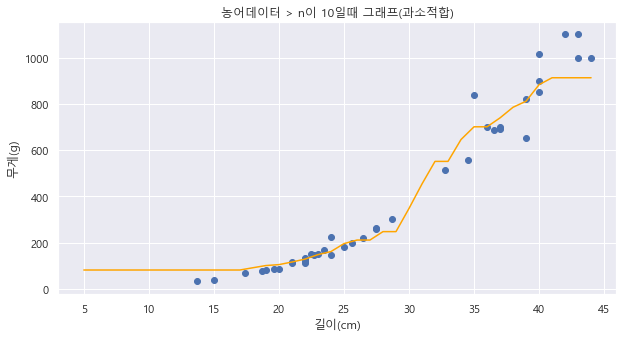

In [74]:
# KNN 회귀 객체 만들기
knr = KNeighborsRegressor()
# 5~45까지 x좌표를 생성
x = np.arange(5,45).reshape(-1,1)

# k-이웃값을 1, 5, 10으로 변경하면서 예측하고 차트 그리기
for n in [1,5,10]: # 5대신 3을 집어넣으면 과소적합을 해결할 수 있음
    knr.n_neighbors = n
    knr.fit(X=new_train_input, y=train_target)

    # x에 대한 예측 도출
    pred = knr.predict(X=x)
    # 훈련세트와 예측 결과를 산점도에 표시
    plt.figure(figsize=(10,5))
    plt.scatter(x=new_train_input, y=train_target)
    plt.plot(x, pred, color='orange') # 실선이 예측된 값을 의미

    title = f'농어데이터 > n이 {n}일때 그래프'
    if n == 1:
        title += '(과대적합)'
    elif n == 10:
        title += '(과소적합)'
    plt.title(title)
    
    plt.xlabel('길이(cm)')
    plt.ylabel('무게(g)')

    plt.show()

    # n=1일때 그래프 >> 과대적합(점들을 지나면서 선이 그려짐)
    # n=10일때 그래프 >> 과소적합(점들을 비켜나가면서 선이 그려짐)